In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import joblib

np.random.seed(42)
tf.random.set_seed(42)

In [7]:
# Jika menggunakan Google Colab
try:
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_csv(list(uploaded.keys())[0], header=None)
except:
    # Load dataset lokal
    data_path = "balloons.data"  # Ganti path jika lokal
    df = pd.read_csv(data_path, header=None)

# Tentukan nama kolom sesuai dataset Balloons
df.columns = ["Color", "Size", "Act", "Age", "Inflated"]
print("Dataset loaded!")
display(df.head())
df.info()

print("\nMissing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Saving balloons.data to balloons.data
Dataset loaded!


,Color,Size,Act,Age,Inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,T
4,YELLOW,LARGE,STRETCH,ADULT,T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Color     16 non-null     object
 1   Size      16 non-null     object
 2   Act       16 non-null     object
 3   Age       16 non-null     object
 4   Inflated  16 non-null     object
dtypes: object(5)
memory usage: 772.0+ bytes

Missing values:
 Color       0
Size        0
Act         0
Age         0
Inflated    0
dtype: int64
Duplicate rows: 0


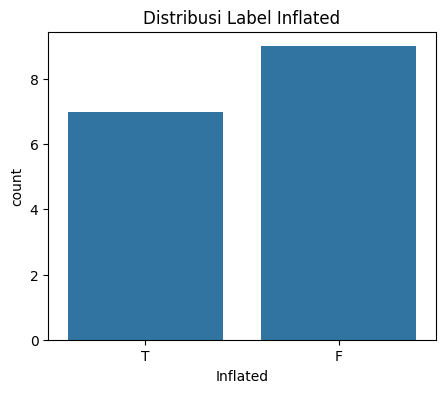

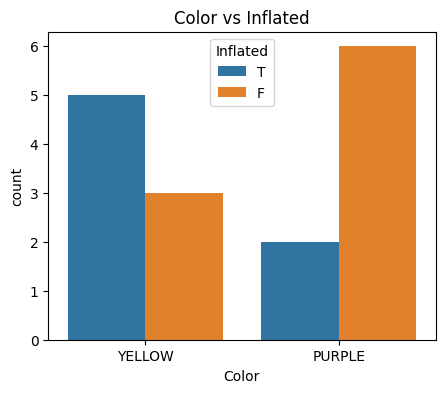

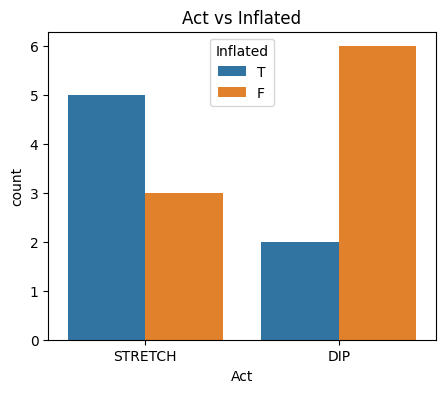

In [8]:
os.makedirs("images", exist_ok=True)

# Distribusi Label
plt.figure(figsize=(5,4))
sns.countplot(x="Inflated", data=df)
plt.title("Distribusi Label Inflated")
plt.savefig("images/distribusi_label.png", dpi=300, bbox_inches='tight')
plt.show()

# Color vs Inflated
plt.figure(figsize=(5,4))
sns.countplot(x="Color", hue="Inflated", data=df)
plt.title("Color vs Inflated")
plt.savefig("images/color_vs_inflated.png", dpi=300, bbox_inches='tight')
plt.show()

# Act vs Inflated
plt.figure(figsize=(5,4))
sns.countplot(x="Act", hue="Inflated", data=df)
plt.title("Act vs Inflated")
plt.savefig("images/act_vs_inflated.png", dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Encoding categorical features
df_enc = df.copy()
encoder = LabelEncoder()
for col in df_enc.columns:
    df_enc[col] = encoder.fit_transform(df_enc[col])

X = df_enc.drop("Inflated", axis=1)
y = df_enc["Inflated"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

os.makedirs("models", exist_ok=True)
joblib.dump(scaler, "models/scaler.pkl")
print("Scaler saved!")

Train size: (12, 4)
Test size: (4, 4)
Scaler saved!


Logistic Regression Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



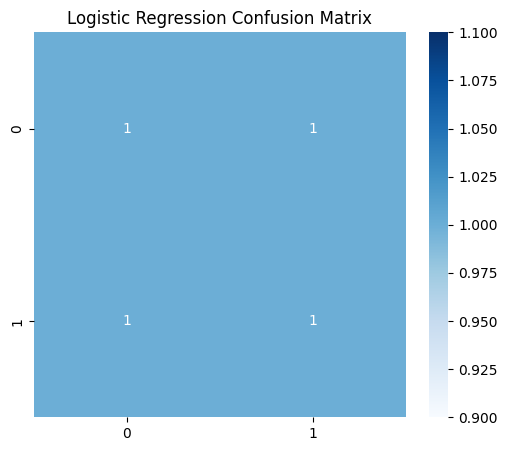

Logistic Regression saved!


In [10]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.savefig("images/lr_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

joblib.dump(lr_model, "models/model_lr.pkl")
print("Logistic Regression saved!")

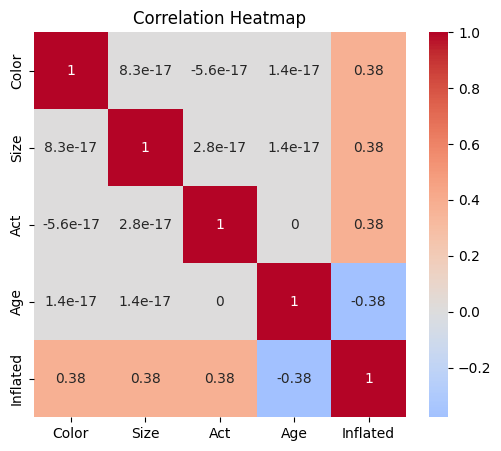

In [14]:
df_enc = df.copy()
encoder = LabelEncoder()

for col in df_enc.columns:
    df_enc[col] = encoder.fit_transform(df_enc[col])

plt.figure(figsize=(6,5))
sns.heatmap(df_enc.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.savefig("images/correlation_heatmap.png")
plt.show()

Random Forest Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



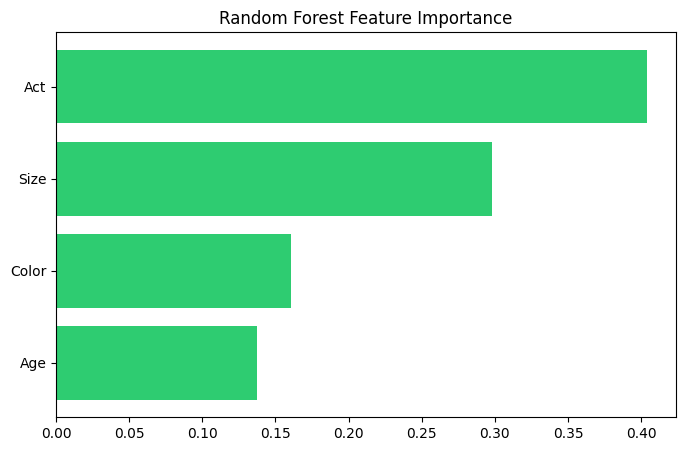

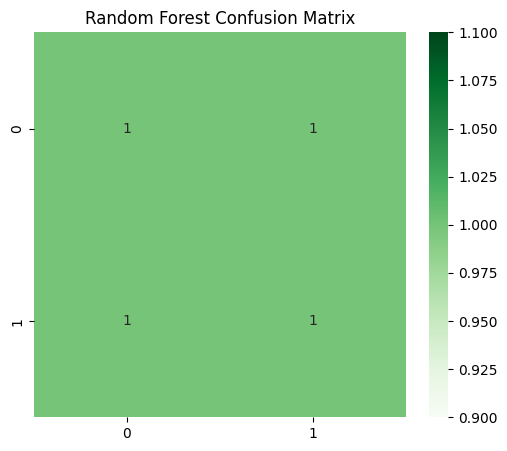

Random Forest saved!


In [11]:
rf_model = RandomForestClassifier(
    n_estimators=100, random_state=42, max_depth=10
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature Importance
fi = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_}).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(8,5))
plt.barh(fi["Feature"], fi["Importance"], color="#2ecc71")
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.savefig("images/rf_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.savefig("images/rf_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

joblib.dump(rf_model, "models/model_rf.pkl")
print("Random Forest saved!")

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step - accuracy: 0.2361 - loss: 0.7839 - val_accuracy: 0.3333 - val_loss: 0.6958
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.3229 - loss: 0.7405 - val_accuracy: 0.3333 - val_loss: 0.6975
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.3229 - loss: 0.7079 - val_accuracy: 0.3333 - val_loss: 0.6987
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3229 - loss: 0.7220 - val_accuracy: 0.3333 - val_loss: 0.6999
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2361 - loss: 0.7368 - val_accuracy: 0.3333 - val_loss: 0.7006
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3229 - loss: 0.7273 - val_accuracy: 0.3333 - val_loss: 0.7020
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0868 - loss: 0.8130 - val_accuracy: 0.3333 - val_loss: 0.7037
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3785 - loss: 0.7125 - val_accuracy: 0.3333 - val_loss

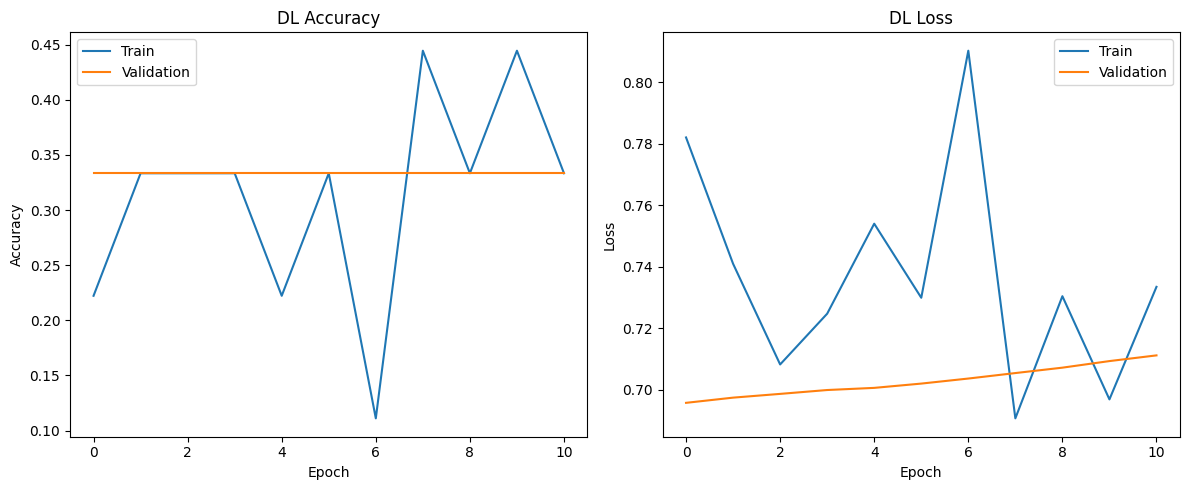

Deep Learning model saved!


In [12]:
dl_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = dl_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=4, callbacks=[early_stop], verbose=1)

y_pred_dl = (dl_model.predict(X_test_scaled) > 0.5).astype(int)

# Metrics
print("Deep Learning Accuracy:", accuracy_score(y_test, y_pred_dl))
print(classification_report(y_test, y_pred_dl))

# Plot History
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('DL Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('DL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig("images/dl_training_history.png", dpi=300, bbox_inches='tight')
plt.show()

dl_model.save("models/model_dl.keras")
print("Deep Learning model saved!")

In [13]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Deep Learning"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_dl)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_dl)
    ]
})
print("\nModel Comparison:\n", results)


Model Comparison:
                  Model  Accuracy  F1-Score
0  Logistic Regression       0.5       0.5
1        Random Forest       0.5       0.5
2        Deep Learning       1.0       1.0
